# Titanic Dataset EDA (Exploratory Data Analysis)

### Import all libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency

### Read the .csv file to create the Pandas DataFrame (df)

In [2]:
df = pd.read_csv ('titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Check missing values within the df

In [3]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### Drop unnecessary columns

In [4]:
df.drop(columns=["PassengerId","Cabin","SibSp","Parch","Ticket","Fare","Embarked"], inplace=True)
df

,Survived,Pclass,Name,Sex,Age
0,0,3,"Braund, Mr. Owen Harris",male,22.0
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0
2,1,3,"Heikkinen, Miss. Laina",female,26.0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0
4,0,3,"Allen, Mr. William Henry",male,35.0
...,...,...,...,...,...
886,0,2,"Montvila, Rev. Juozas",male,27.0
887,1,1,"Graham, Miss. Margaret Edith",female,19.0
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN
889,1,1,"Behr, Mr. Karl Howell",male,26.0


### Check the survival variable from the dataset

[Text(0, 0, '549'), Text(0, 0, '342')]

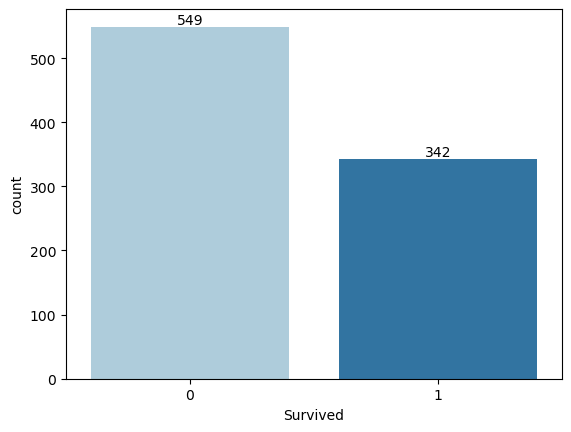

In [24]:
plot1 = sns.countplot(x='Survived',data=df, palette ="Paired")
plot1.bar_label(ax.containers[0])

## 1. Determine if the survival rate is associated to the gender

### Create a countplot to compare the survival rate between males and females

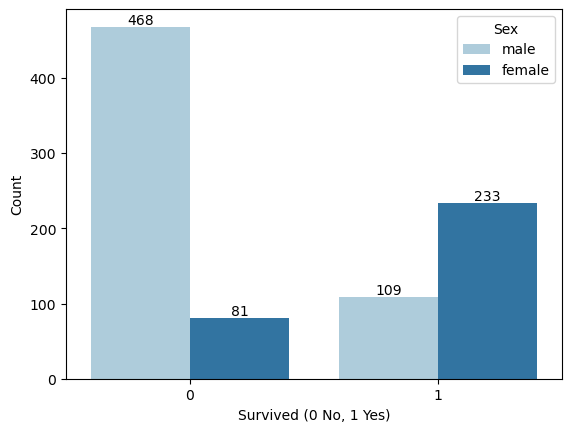

In [72]:
plot2= sns.countplot(x='Survived',hue='Sex' ,data=df, palette ="Paired")
plt.xlabel("Survived (0 No, 1 Yes)")
plt.ylabel("Count")
for i in plot2.containers:
    plot2.bar_label(i)

In [7]:
df_sex = df.groupby(["Sex", "Survived"]).size().unstack()
df_sex

Survived,0,1
Sex,,
female,81,233
male,468,109


### 𝐻0: 𝑇ℎ𝑒 𝑠𝑢𝑟𝑣𝑖𝑣𝑎𝑙 𝑟𝑎𝑡𝑒 𝑎𝑛𝑑 𝑔𝑒𝑛𝑑𝑒𝑟 𝑎𝑟𝑒 𝑖𝑛𝑑𝑒𝑝𝑒𝑑𝑒𝑛𝑡 
### 𝐻𝑎: 𝑇ℎ𝑒 𝑠𝑢𝑟𝑣𝑖𝑣𝑎𝑙 𝑟𝑎𝑡𝑒 𝑎𝑛𝑑 𝑔𝑒𝑛𝑑𝑒𝑟 𝑎𝑟𝑒 𝑛𝑜𝑡 𝑖𝑛𝑑𝑒𝑝𝑒𝑑𝑒𝑛𝑡

In [8]:
chi2, p, dof, expected = chi2_contingency(df_sex)
print("Chi-squared:", chi2)
print("Degrees of Freedom:", dof)
print("P-Value:", p)
print("Decision Point (0,05): 3.84")

Chi-squared: 260.71702016732104
Degrees of Freedom: 1
P-Value: 1.1973570627755645e-58
Decision Point (0,05): 3.84


### Since the Chi-squared statistic (260.72) is greater than the Decision Point (3.84), we reject H0 and accept Ha. Then the survival rate and gender class are not independent.

### Conclusion: After reviewing the countplot and the chi-squared test, we can determine that the survival rate is associated with gender, and women had a greater chance of surviving.

## 2. Determine if the survival rate is associated to the class of passenger

### Create a countplot to compare the survival rate between the different classes (1,2 or 3)

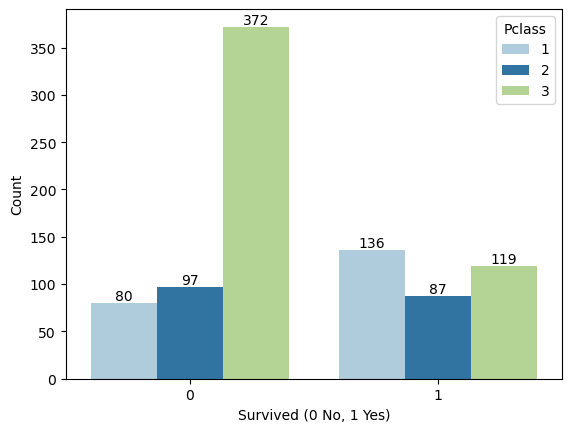

In [73]:
plot3=sns.countplot(x='Survived',hue='Pclass' ,data=df, palette ="Paired")
plt.xlabel("Survived (0 No, 1 Yes)")
plt.ylabel("Count")
for i in plot3.containers:
    plot3.bar_label(i)

In [10]:
df_class = df.groupby(["Pclass", "Survived"]).size().unstack()
df_class

Survived,0,1
Pclass,,
1,80,136
2,97,87
3,372,119


### 𝐻0: 𝑇ℎ𝑒 𝑠𝑢𝑟𝑣𝑖𝑣𝑎𝑙 𝑟𝑎𝑡𝑒 𝑎𝑛𝑑 𝑝𝑎𝑠𝑠𝑒𝑛𝑔𝑒𝑟 𝑐𝑙𝑎𝑠𝑠 𝑎𝑟𝑒 𝑖𝑛𝑑𝑒𝑝𝑒𝑑𝑒𝑛𝑡 
### 𝐻𝑎: 𝑇ℎ𝑒 𝑠𝑢𝑟𝑣𝑖𝑣𝑎𝑙 𝑟𝑎𝑡𝑒 𝑎𝑛𝑑 𝑝𝑎𝑠𝑠𝑒𝑛𝑔𝑒𝑟 𝑐𝑙𝑎𝑠𝑠 𝑎𝑟𝑒 𝑛𝑜𝑡 𝑖𝑛𝑑𝑒𝑝𝑒𝑛𝑑𝑒𝑛𝑡

In [11]:
chi2, p, dof, expected = chi2_contingency(df_class)
print("Chi-squared:", chi2)
print("Degrees of Freedom:", dof)
print("P-Value:", p)
print("Decision Point (0,05): 5.99")

Chi-squared: 102.88898875696056
Degrees of Freedom: 2
P-Value: 4.549251711298793e-23
Decision Point (0,05): 5.99


### Since the Chi-squared statistic (102.89) is greater than the Decision Point (5.99), we reject H0 and accept Ha. Then the survival rate and gender class are not independent.

### Conclusion: After reviewing the countplot and the chi-squared test, we can determine that the survival rate is associated with the class of the passenger. The percentage of survivors is inverse to the class, with the following values: 1st class: 62,9%, 2nd class: 47,3%, 3rd Class: 24,2%. 
### Unfortunately, passengers from class 3 had only a small chance of surviving.

## 3. Determine the survival rate is associated to the age

### Create an histogram for the age of the passengers

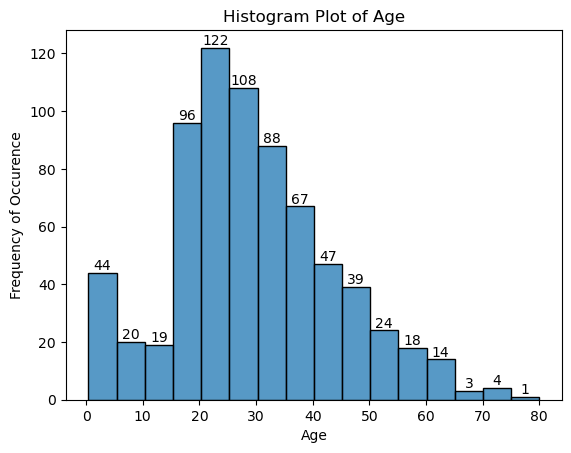

In [54]:
plot4=sns.histplot(df['Age'], bins=16)
plt.ylabel("Frequency of Occurence")
plt.title("Histogram Plot of Age")
for i in plot4.containers:
    plot4.bar_label(i)

### Create an histogram for the age of the passengers that didn't survive

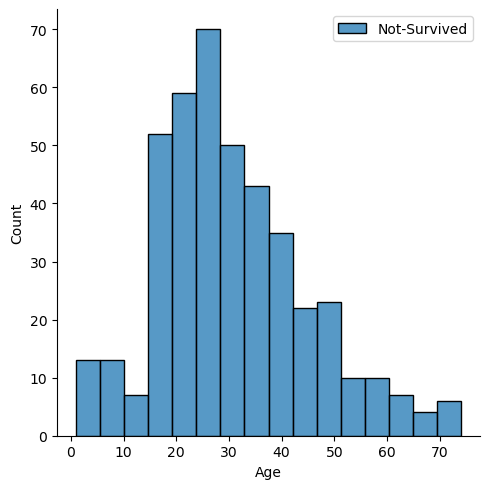

In [67]:
sns.displot(df.Age[df.Survived == 0],label="Not-Survived")
plt.legend();

### Create an histogram for the age of the passengers that survived

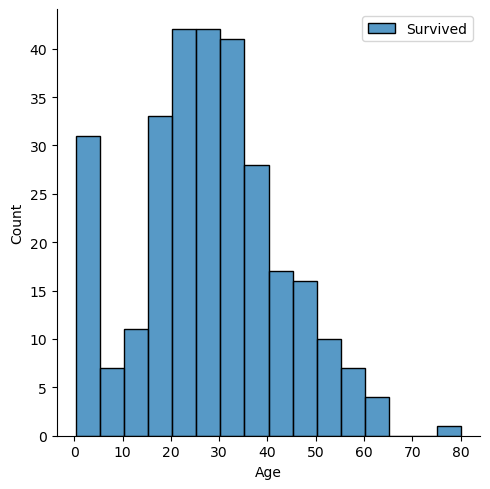

In [63]:
sns.displot(df.Age[df.Survived == 1], label="Survived")
plt.legend();

### Create a subplot to easily compare the histograms

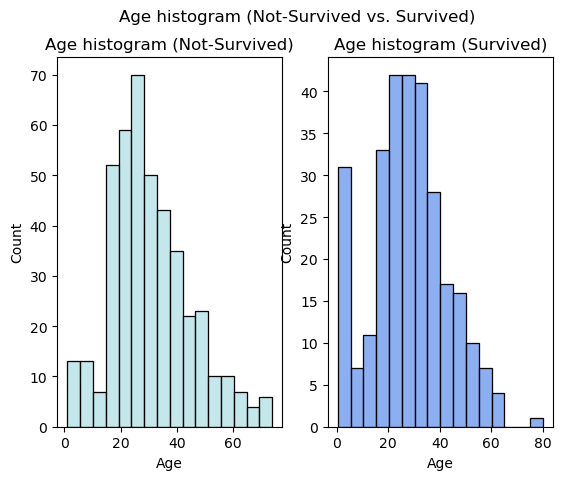

In [53]:
plt.subplot(1,2,1)
sns.histplot(df.Age[df.Survived == 0],color="powderblue")
plt.title("Age histogram (Not-Survived)")

plt.subplot(1,2,2)
sns.histplot(df.Age[df.Survived == 1],color="cornflowerblue")
plt.title("Age histogram (Survived)")

plt.suptitle("Age histogram (Not-Survived vs. Survived)")
plt.show()

### Create a box-plot for the age

Text(0.5, 0, 'Age')

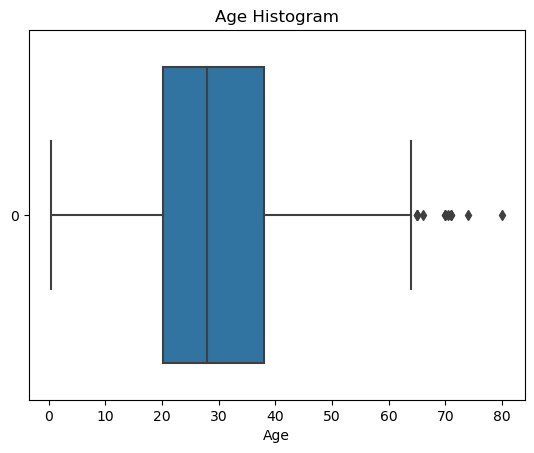

In [68]:
sns.boxplot(data=df['Age'], orient='h')
plt.title("Age Histogram")
plt.show
plt.xlabel("Age")

### Create a box-plot for the age between survivors and non-survivors

<function matplotlib.pyplot.show(close=None, block=None)>

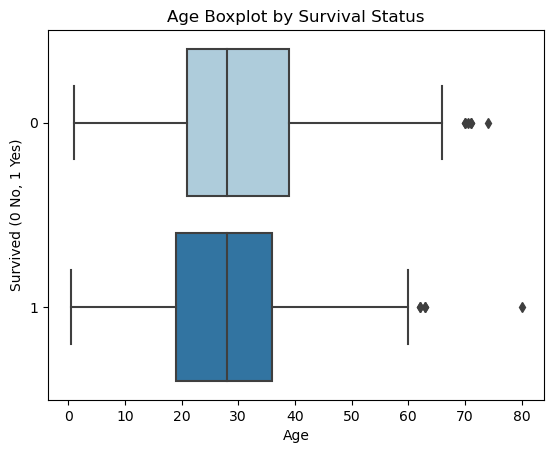

In [17]:
df_dead = df[df["Survived"]==0]["Age"]
df_alive = df[df["Survived"]==1]["Age"]
data1= [df_dead, df_alive]
color=["darkturquoise","r"]
sns.boxplot(data = data1,orient='h',palette ="Paired")
plt.title('Age Boxplot by Survival Status')
plt.ylabel("Survived (0 No, 1 Yes)")
plt.xlabel("Age")
plt.show

### Conclusion: The median age of the people who survived and the median age of those who didn't are the same. However, we can determine that the survival rate is greater in ages from 0 to 5. On the other hand, the survival rate of passengers older than 60 years is really low (with almost no counts, except for some outliers).

### Based on the previous information, we can determine that age and survival rate are related. This could be explained by the "Women and Children First" policy.